In [27]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings("ignore")

### Read the file

In [2]:
rawdata = pd.read_excel('ice_class_raw_data.xlsx') 

- timeyearmonth_x: Year/Month for this record bug_rate
- bug_rate: Monthly Rate of Customer Calls into Support Center for this product associated with Software Bugs
- config_rate: Monthly Rate of Customer Calls into Support Center for this product associated with Configuration Issues
- hw_rate: Monthly Rate  of Customer Calls into Support Center for this product associated with Hardware Bugs
- esc_rate: Monthly Rate of Escalations from Support Center to Engineering for this product
- init_sev_1_2_rate: Monthly Rate of Customer Calls into Support Center for this product with Severity 1 or 2
- diag_rate: Monthly Rate of Customer Calls into Support Center  for this product associated with diagnostic Issues
- sw_not_bug_rate: Monthly Rate  of Customer Calls into Support Center  for this product associated with software not a bug  Issues

ces_y: Did one of more escalations occurred for this product?

### Display the dataframe

In [3]:
display(rawdata.shape)
display(rawdata.head())
rawdata.info()

(5902, 9)

,timeyearmonth_x,bug_rate,config_rate,hw_rate,esc_rate,init_sev_1_2_rate,diag_rate,sw_not_bug_rate,ces_y
0,2016-08,8.333333,45.833333,0.000000,4.166667,4.166667,8.333333,41.666667,0
1,2016-09,9.523810,52.380952,4.761905,0.000000,0.000000,0.000000,19.047619,0
2,2016-10,11.111111,50.000000,2.777778,5.555556,8.333333,5.555556,27.777778,0
3,2016-11,17.391304,17.391304,4.347826,4.347826,4.347826,13.043478,30.434783,0
4,2016-12,16.000000,48.000000,8.000000,8.000000,0.000000,12.000000,24.000000,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5902 entries, 0 to 5901
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timeyearmonth_x    5902 non-null   object 
 1   bug_rate           5902 non-null   float64
 2   config_rate        5902 non-null   float64
 3   hw_rate            5902 non-null   float64
 4   esc_rate           5902 non-null   float64
 5   init_sev_1_2_rate  5902 non-null   float64
 6   diag_rate          5902 non-null   float64
 7   sw_not_bug_rate    5902 non-null   float64
 8   ces_y              5902 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 415.1+ KB


### Check the null values

In [11]:
display(rawdata.isnull().sum())
display(rawdata.duplicated().sum())
display(rawdata.nunique())

timeyearmonth_x      0
bug_rate             0
config_rate          0
hw_rate              0
esc_rate             0
init_sev_1_2_rate    0
diag_rate            0
sw_not_bug_rate      0
ces_y                0
dtype: int64

0

timeyearmonth_x        26
bug_rate             3481
config_rate          3999
hw_rate              3903
esc_rate             2798
init_sev_1_2_rate    3252
diag_rate            3374
sw_not_bug_rate      3775
ces_y                   2
dtype: int64

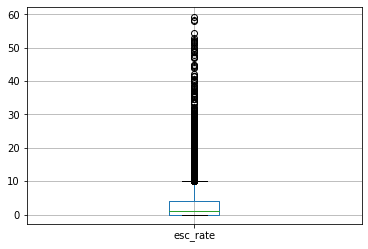

In [12]:
rawdata.boxplot(column=['esc_rate'])
plt.show()

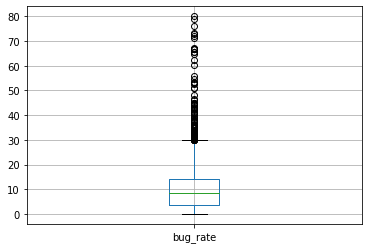

In [13]:
rawdata.boxplot(column=['bug_rate'])
plt.show()

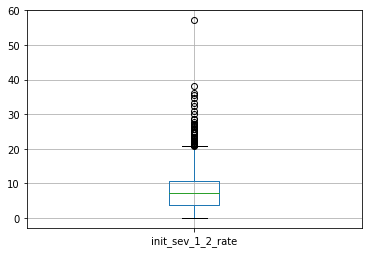

In [14]:
rawdata.boxplot(column=['init_sev_1_2_rate'])
plt.show()

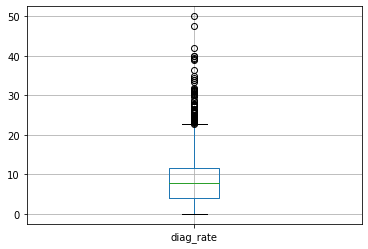

In [15]:
rawdata.boxplot(column=['diag_rate'])
plt.show()

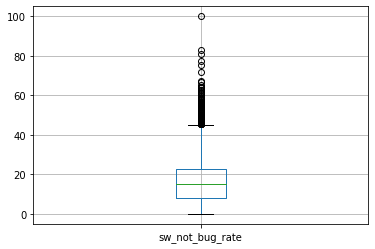

In [16]:
rawdata.boxplot(column=['sw_not_bug_rate'])
plt.show()

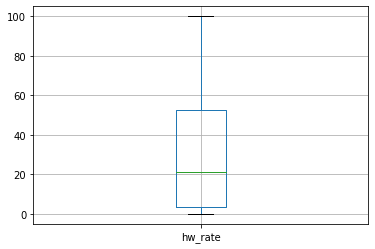

In [17]:
rawdata.boxplot(column=['hw_rate'])
plt.show()

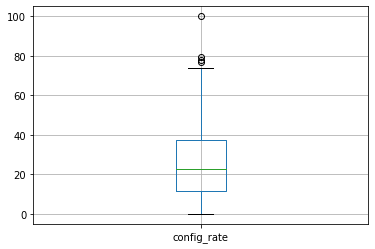

In [6]:
rawdata.boxplot(column=['config_rate'])
plt.show()

### Modeling

In [23]:
dataset = rawdata.copy()
X = dataset.drop(columns=['timeyearmonth_x', 'ces_y'])
y = dataset['ces_y']

X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0,test_size=0.1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# from sklearn.metrics import mean_squared_error
# train_mse = mean_squared_error(y_train, train_preds)

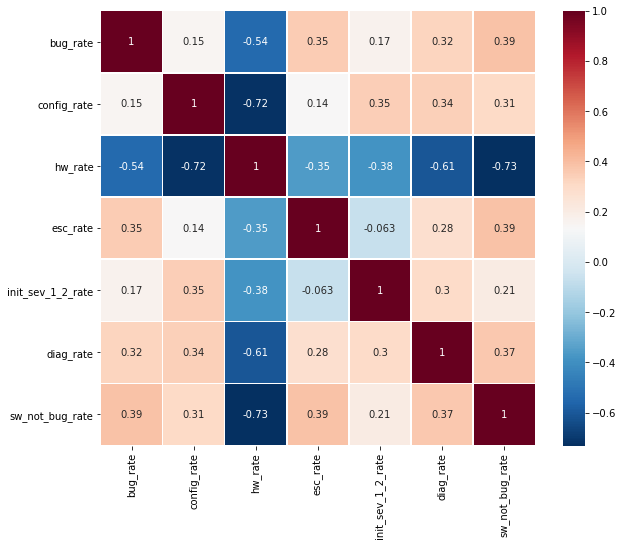

In [24]:
plt.figure(figsize=(10,8))
cm = X.corr(method='pearson')
sns.heatmap(cm, annot=True, cmap = 'RdBu_r',linewidth=0.5,square=True)
plt.show()

### 1. Logistic Regression

In [28]:
def model_accuracy(X_train,y_train,model):
    
    model.fit(X_train,y_train)
    cv_scores = cross_val_score(model,X_train,y_train,scoring='accuracy',cv=3)
    cv_acc = np.mean(cv_scores)
    
    return cv_acc
    raise NotImplementedError()

In [30]:
def logistic_best_c(X_train,y_train,c_range):
    acc = []
    for num in c_range:
        Logistic_model = LogisticRegression(penalty = 'l2', C = num,random_state = 0)
        acc_score = model_accuracy(X_train,y_train,Logistic_model)
        acc.append(acc_score)
    idx = np.argmax(acc)
    opt_c = c_range[idx]
    
    plt.plot(acc)
    plt.xlabel('Num_c')
    plt.ylabel('Cross-validation accuracy')
    plt.title('Optimal number of c is {}'.format(opt_c))
    plt.show()
    print('Accuracy on train set is {:.8f}'.format(max(acc)))
    
    return opt_c 

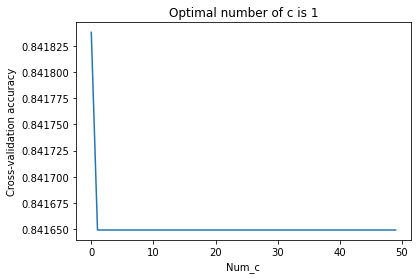

Accuracy on train set is 0.84183779


In [31]:
c_range = range(1,51)
opt_c = logistic_best_c(X_train_scaled,y_train,c_range)

In [32]:
opt_logistic_regression_model = LogisticRegression(penalty = 'l2', C = 1,random_state = 0)
acc_score = model_accuracy(X_train_scaled,y_train,Logistic_model)
print('Accuracy on train set is {:.8f}'.format(acc_score))

Accuracy on train set is 0.84183779


In [33]:
# try data on our test set
opt_logistic_regression_model = LogisticRegression(penalty = 'l2', C = 1,random_state = 0)
opt_logistic_regression_model.fit(X_train_scaled,y_train)
test_preds = opt_logistic_regression_model.predict(X_test_scaled)
test_acc = np.sum(test_preds==y_test)/len(y_test)
print('Test set accuracy is {:.3f}'.format(test_acc))

Test set accuracy is 0.851


### 2. Random Forest

In [139]:
# use grid search to find the best parameters
from sklearn.model_selection import GridSearchCV

params = {'min_samples_leaf':[1,3,10],'n_estimators':[100,1000],
          'max_features':[0.1,0.5,1.],'max_samples':[0.5,None]}

model = RandomForestClassifier()
grid_search = GridSearchCV(model,params,cv=3)
grid_search.fit(X_train_scaled,y_train)
grid_search.best_params_

{'max_features': 0.5,
 'max_samples': 0.5,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [140]:
# use the best para to calculate the conclusions
opt_rf_model = RandomForestClassifier(criterion='gini',max_depth=None, min_samples_leaf=1,n_estimators=100,
                                 max_features=0.5,max_samples=0.5,random_state=0)

acc_score = model_accuracy(X_train_scaled,y_train,opt_rf_model)
print('Accuracy on train set is {:.8f}'.format(acc_score))

Accuracy on train set is 0.85897176


In [34]:
# try data on our test set
opt_rf_model = RandomForestClassifier(criterion='gini',max_depth=None, min_samples_leaf=1,n_estimators=100,
                                 max_features=0.5,max_samples=0.5,random_state=0)
opt_rf_model.fit(X_train_scaled,y_train)
test_preds = opt_rf_model.predict(X_test_scaled)
test_acc = np.sum(test_preds==y_test)/len(y_test)
print('Test set accuracy is {:.3f}'.format(test_acc))

Test set accuracy is 0.868


In [35]:
def calc_feature_importances(model,feat_names,num_to_show):
    # Determine the relative importance of each feature using the random forest model
    importances = model.feature_importances_
    # Get an array of the indices that would sort "importances" in reverse order to get largest to smallest
    indices = np.argsort(importances)[::-1]
    ranked_feats = []
    for i in range(len(indices)):
        feat_name = feat_names[indices[i]]
        ranked_feats.append(feat_name)
    RF_ranking = pd.DataFrame()
    RF_ranking['Feat Index'] = indices
    RF_ranking['Feature'] = ranked_feats
    RF_ranking['Importance'] = np.sort(importances)[::-1]
    display(RF_ranking.iloc[:num_to_show,:])

    # Plot the importance value for each feature
    RF_ranking[:num_to_show][::-1].plot(x='Feature',y='Importance',kind='barh',figsize=(12,7),legend=False,title='RF Feature Importance')
    plt.show()
    return RF_ranking

,Feat Index,Feature,Importance
0,0,bug_rate,0.155939
1,3,esc_rate,0.150036
2,4,init_sev_1_2_rate,0.144512
3,6,sw_not_bug_rate,0.143286
4,1,config_rate,0.139052
5,5,diag_rate,0.134848
6,2,hw_rate,0.132327


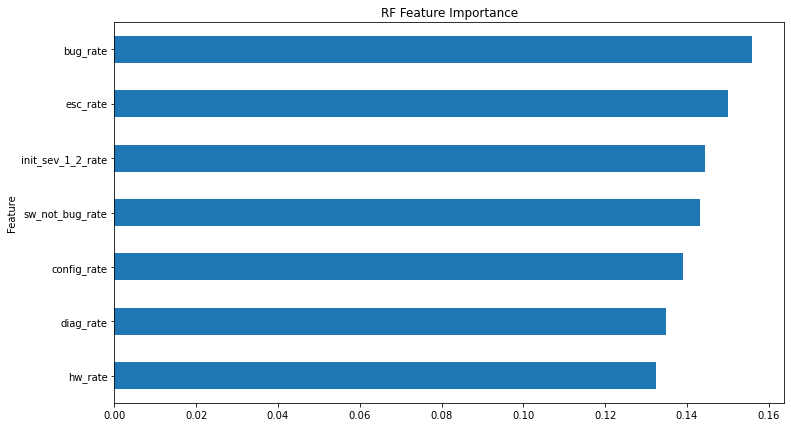

In [36]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled,y_train)
top_feats = 7
ranking = calc_feature_importances(rf_model,X_train.columns,top_feats)

### 3. Adaboost 

In [37]:
#use Adaboost, just select a model parameter to look at the situation
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier

In [38]:
# find best learn range

def boost_best_range(X_train,y_train,learners_range):
    acc = []
    for num in learners_range:
        boosting_model = AdaBoostClassifier(n_estimators=num,random_state=0)
        acc_score = model_accuracy(X_train,y_train,boosting_model)
        acc.append(acc_score)
    idx = np.argmax(acc)
    opt_learner_range = learners_range[idx]
    
    plt.plot(acc)
    plt.xlabel('Num_learner_range')
    plt.ylabel('Cross-validation accuracy')
    plt.title('Optimal number of range is {}'.format(opt_learner_range))
    plt.show()
    print('Accuracy on train set is {:.8f}'.format(max(acc)))
    
    return opt_learner_range

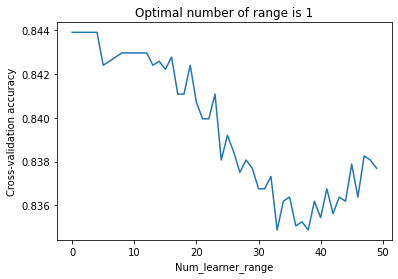

Accuracy on train set is 0.84390893


In [39]:
learners_range = range(1,51)
learners_range = boost_best_range(X_train_scaled,y_train,learners_range)
opt_boost_model = AdaBoostClassifier(n_estimators=1,random_state=0)

In [40]:
opt_boost_model = AdaBoostClassifier(n_estimators=1,random_state=0)
acc_score = model_accuracy(X_train_scaled,y_train,opt_boost_model)
print('Accuracy on train set is {:.8f}'.format(acc_score))

Accuracy on train set is 0.84390893


In [41]:
# try data on our test set
opt_boost_model = AdaBoostClassifier(n_estimators=1,random_state=0)
opt_boost_model.fit(X_train_scaled,y_train)
test_preds = opt_boost_model.predict(X_test_scaled)
test_acc = np.sum(test_preds==y_test)/len(y_test)
print('Test set accuracy is {:.3f}'.format(test_acc))

Test set accuracy is 0.856


### 4. Decision Tree

Accuracy on train set is 0.81114642


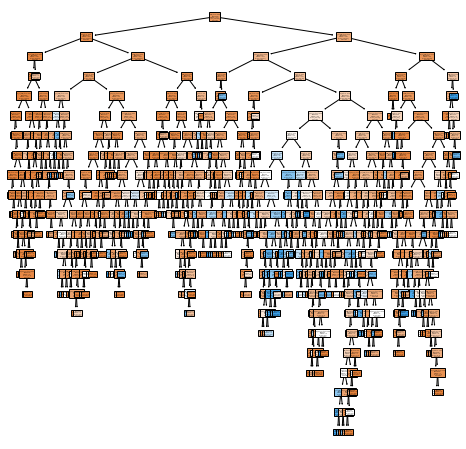

In [172]:
tree_model = DecisionTreeClassifier(criterion='gini',max_depth=None,min_samples_leaf=4,random_state=0)

# Fit the tree to the data
tree_model.fit(X_train_scaled,y_train)


acc_score = model_accuracy(X_train_scaled,y_train,tree_model)
print('Accuracy on train set is {:.8f}'.format(acc_score))


# Visualize the decision tree
plt.figure(figsize=(8,8))
plot_tree(tree_model,feature_names=X_train.columns,class_names=["No", "Yes"],filled=True)
plt.show()

In [42]:
# try data on our test set
tree_model = DecisionTreeClassifier(criterion='gini',max_depth=None,min_samples_leaf=4,random_state=0)
tree_model.fit(X_train_scaled,y_train)
test_preds = tree_model.predict(X_test_scaled)
test_acc = np.sum(test_preds==y_test)/len(y_test)
print('Test set accuracy is {:.3f}'.format(test_acc))

Test set accuracy is 0.805


### 5. Ensumble Model

In [43]:
# Instead of just using one model, we try to use several models together
def ensumble_best_range(X_train,y_train,a_range):
    acc = []
    for num in a_range:
        ensemble_model = VotingClassifier(estimators=[('rf',opt_rf_model),
                                             ('ada',opt_boost_model)],
                                 voting='soft',
                                 weights = [num,1])
        acc_score = model_accuracy(X_train,y_train,ensemble_model)
        acc.append(acc_score)
    idx = np.argmax(acc)
    opt_a_range = a_range[idx]
    
    plt.plot(acc)
    plt.xlabel('Num_a_range')
    plt.ylabel('Cross-validation accuracy')
    plt.title('Optimal number of range is {}'.format(opt_a_range))
    plt.show()
    print('Accuracy on train set is {:.8f}'.format(max(acc)))
    
    return opt_a_range

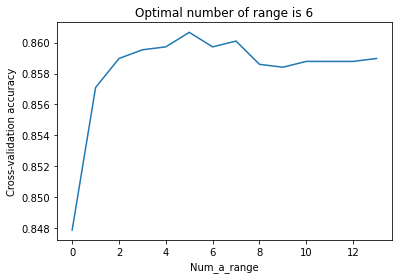

Accuracy on train set is 0.86066678


In [44]:
a_range = range(1,15)
ensemble_model = ensumble_best_range(X_train_scaled,y_train,a_range)
opt_ensemble_model = VotingClassifier(estimators=[('rf',opt_rf_model),
                                             ('ada',opt_boost_model)],
                                 voting='soft',
                                 weights = [6,1])

In [45]:
# try data on our test set
opt_ensemble_model = VotingClassifier(estimators=[('rf',opt_rf_model),
                                             ('ada',opt_boost_model)],
                                 voting='soft',
                                 weights = [6,1])
opt_ensemble_model.fit(X_train_scaled,y_train)
test_preds = opt_ensemble_model.predict(X_test_scaled)
test_acc = np.sum(test_preds==y_test)/len(y_test)
print('Test set accuracy is {:.3f}'.format(test_acc))

Test set accuracy is 0.871


### 6. MLP Model

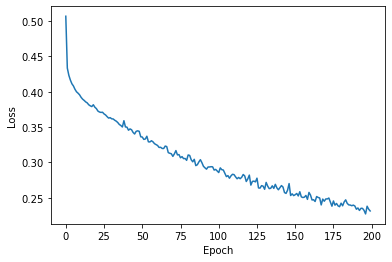

In [46]:
# Let's try a deeper network and use a relu activation function
from sklearn.neural_network import MLPClassifier
mlp_model_deep = MLPClassifier(hidden_layer_sizes=(100,50,20,10),activation='relu',learning_rate_init=0.001,
                               max_iter=200,alpha=0.1,random_state=0)
mlp_model_deep.fit(X_train_scaled,y_train)

# Let's plot the loss curve on the training set
plt.plot(mlp_model_deep.loss_curve_)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [47]:
acc_score = model_accuracy(X_train_scaled,y_train,mlp_model_deep)
print('Accuracy on train set is {:.8f}'.format(acc_score))

Accuracy on train set is 0.83468127


In [48]:
# try data on our test set
mlp_model_deep = MLPClassifier(hidden_layer_sizes=(100,50,20,10),activation='relu',learning_rate_init=0.001,
                               max_iter=200,alpha=0.1,random_state=0)
mlp_model_deep.fit(X_train_scaled,y_train)
test_preds = mlp_model_deep.predict(X_test_scaled)
test_acc = np.sum(test_preds==y_test)/len(y_test)
print('Test set accuracy is {:.3f}'.format(test_acc))

Test set accuracy is 0.824
